In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student_Performance.csv')

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

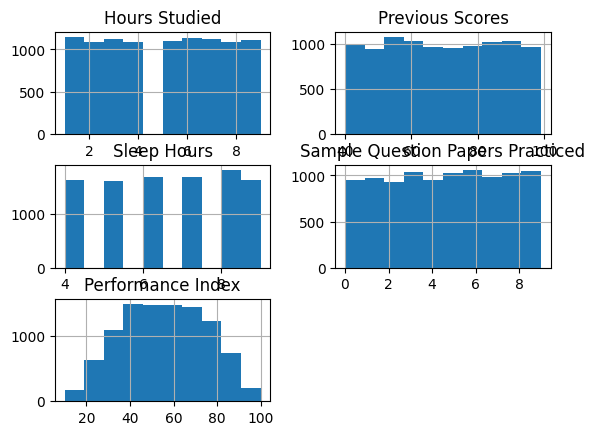

In [4]:
df.hist()

In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [7]:
df['Extracurricular Activities']=encoder.fit_transform(df['Extracurricular Activities'])

In [8]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [9]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [10]:
fea=['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']

In [11]:
X,Y=df[fea],df['Performance Index']


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [15]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
X_train.shape

(8000, 5)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
model=Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))

In [21]:
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])

In [22]:
history=model.fit(X_train,Y_train,epochs=10,batch_size=16)

Epoch 1/10
500/500 [==============================] - 3s 2ms/step - loss: 666.2041 - mean_squared_error: 666.2041 - mean_absolute_error: 15.8735
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 4.9184 - mean_squared_error: 4.9184 - mean_absolute_error: 1.7642
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 4.5633 - mean_squared_error: 4.5633 - mean_absolute_error: 1.6958
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 4.4334 - mean_squared_error: 4.4334 - mean_absolute_error: 1.6765
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 4.4104 - mean_squared_error: 4.4104 - mean_absolute_error: 1.6720
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 4.3829 - mean_squared_error: 4.3829 - mean_absolute_error: 1.6632
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 4.4603 - mean_squared_error: 4.4603 - mean_absolute_error: 1.6832
Epoch 8/10
500/

In [23]:
import matplotlib.pyplot as plt

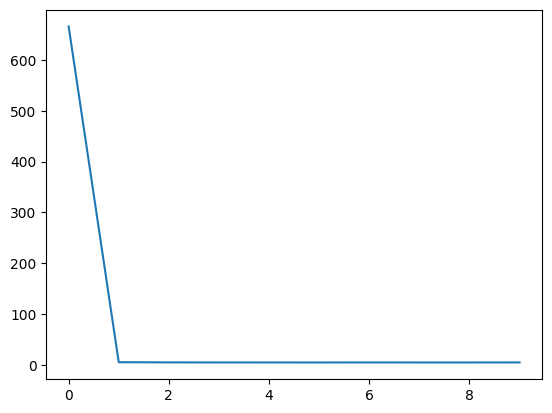

In [25]:
plt.plot(history.history['loss'])

In [26]:
y_pred=model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [27]:
r2_score(Y_test,y_pred)

0.9885987800042715

In [ ]:
y_pred=model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
r2_score(Y_test,y_pred)

0.9885987800042715

In [28]:
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten

In [57]:
model2=Sequential()
model2.add(LSTM(32,activation='relu',input_shape=(X_train.shape[1], 1)))
#model2.add(LSTM(16,activation='relu'))
#model2.add(LSTM(8,activation='relu'))
# model2.add(LSTM(4,activation='relu'))
model2.add(Dense(1,activation='linear'))

In [58]:
model2.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])

In [59]:
history=model2.fit(X_train.reshape(X_train.shape[0],X_train.shape[1],1),Y_train,epochs=10,batch_size=16)

Epoch 1/10
500/500 [==============================] - 3s 3ms/step - loss: 699.7520 - mean_squared_error: 699.7520 - mean_absolute_error: 18.5770
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 177.2401 - mean_squared_error: 177.2401 - mean_absolute_error: 11.0789
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 170.9374 - mean_squared_error: 170.9374 - mean_absolute_error: 10.8657
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 154.6326 - mean_squared_error: 154.6326 - mean_absolute_error: 10.3086
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 91.9536 - mean_squared_error: 91.9536 - mean_absolute_error: 7.7663
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 15.4704 - mean_squared_error: 15.4704 - mean_absolute_error: 2.9801
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 8.7152 - mean_squared_error: 8.7152 - mean_absolute_error: 2.3

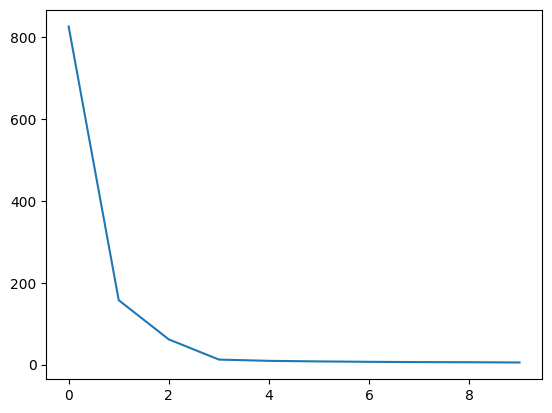

In [48]:
plt.plot(history.history['loss'])

In [49]:
y_pred2=model2.predict(X_test)

63/63 [==============================] - 1s 5ms/step


In [50]:
r2_score(Y_test,y_pred)

0.9885987800042715